In [6]:
# https://github.com/hadley/rvest
library(dplyr)
library(tidyr)
library(rvest)
library(ggplot2)

last_chap <- 36
caps <- formatC(2:last_chap, width = 3, flag = '0') 
chapters <- rep(0, last_chap-1)


In [ ]:
for(i in 1:(last_chap-1)){
    s <- sprintf('http://www.readcentral.com/chapters/Mark-Twain/The-Adventures-of-Tom-Sawyer-Complete/%s', caps[i])
    chapters[i] <- read_html(s) %>% html_nodes("p") %>% html_text() %>% paste(collapse = ' ')
}


In [ ]:
library(stringr)
chapters <- data.frame(Chapters = chapters)
head(chapters)

In [6]:
chapPC <- chapters %>% mutate(comas = str_count(Chapters, pattern = ','), caracteres = str_count(Chapters))
head(chapPC)

Chapters,puntos,caracteres


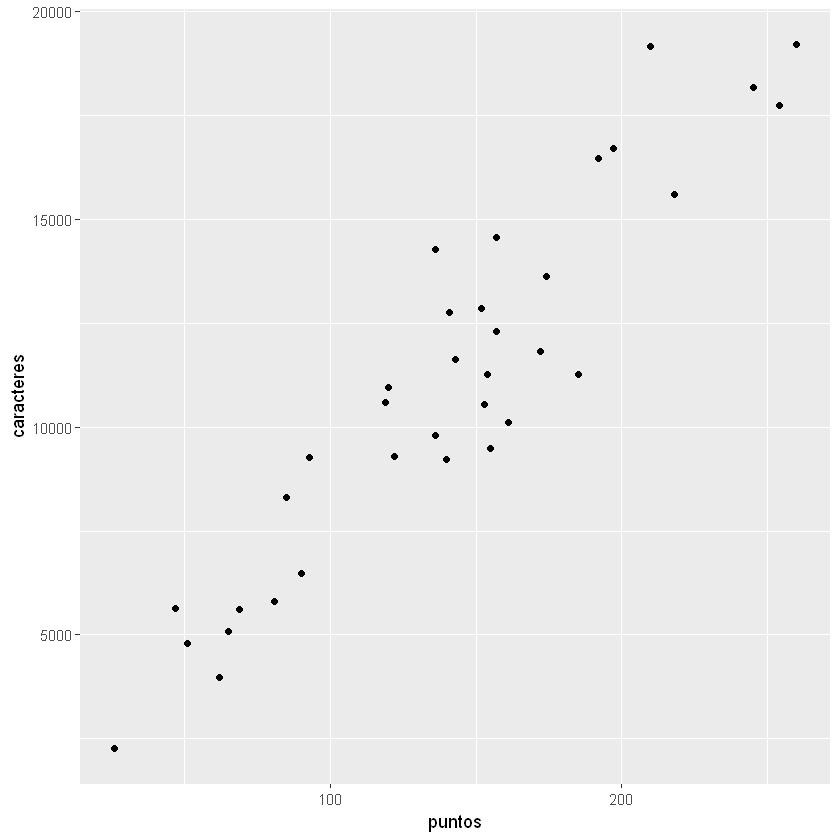

In [13]:
qplot(x = puntos, y = caracteres, data = chapPC, geom = "point")

In [1]:
rmseABline <- function(a, b){
    chapPC$pred <- a*chapPC$puntos + b
    rmseCar <- mean((chapPC$pred - chapPC$caracteres)^2)^0.5
    
    p <- ggplot(chapPC, aes(puntos, caracteres)) + geom_point() + geom_abline(slope = a, intercept = b) + 
        geom_segment(aes(xend = puntos, yend = pred))
    return(list(p, rmseCar))
}


[[1]]

[[2]]
[1] 6451.715


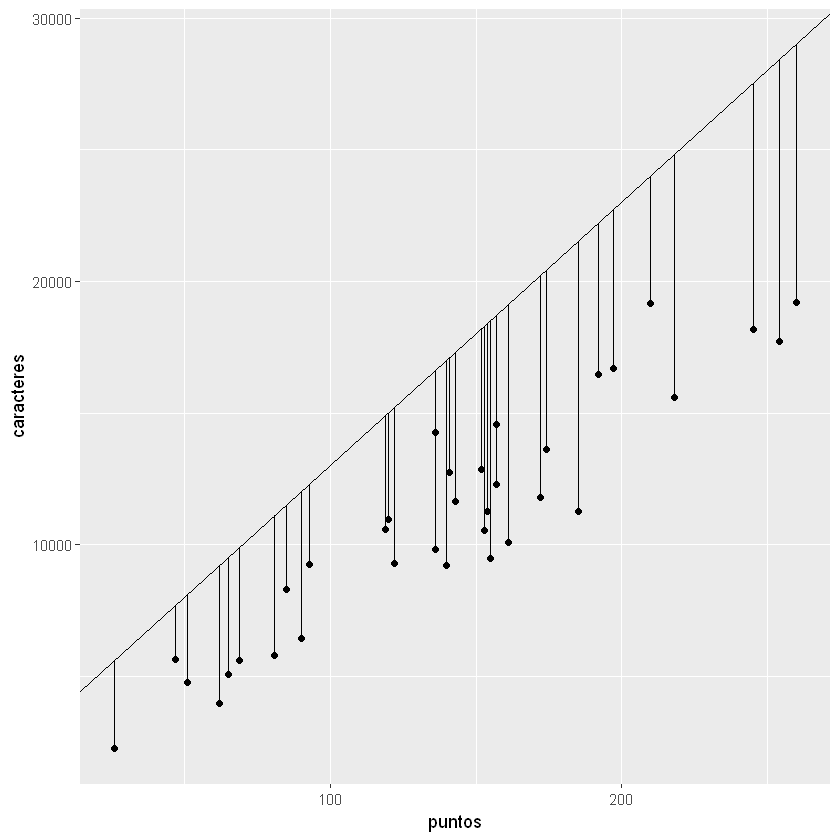

In [29]:
rmseABline(a = 100, b = 3000)

[[1]]

[[2]]
[1] 4642.788


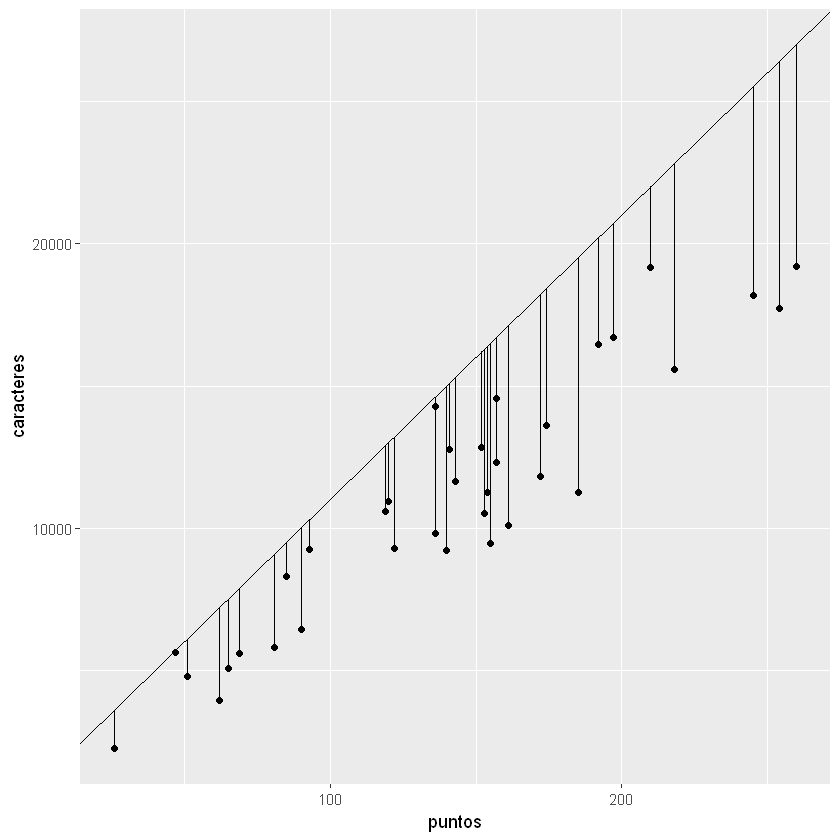

In [37]:
rmseABline(a = 100, b = 1000)

[[1]]

[[2]]
[1] 1568.022


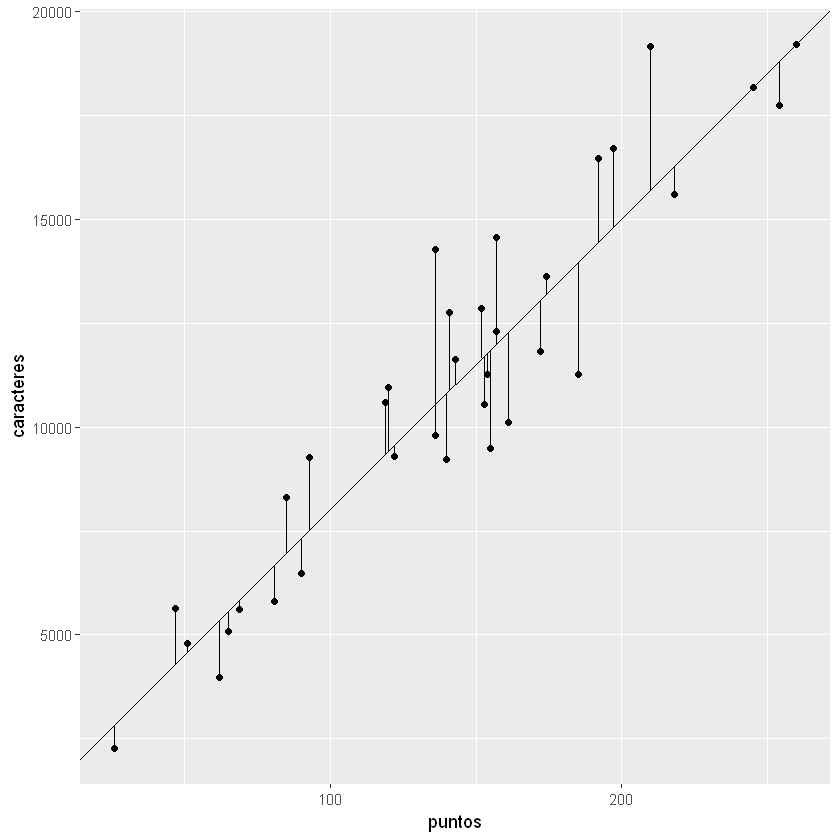

In [38]:
rmseABline(a = 70, b = 1000)


Call:
lm(formula = caracteres ~ puntos, data = chapPC)

Coefficients:
(Intercept)       puntos  
    1141.49        70.43  


[[1]]

[[2]]
[1] 1554.81


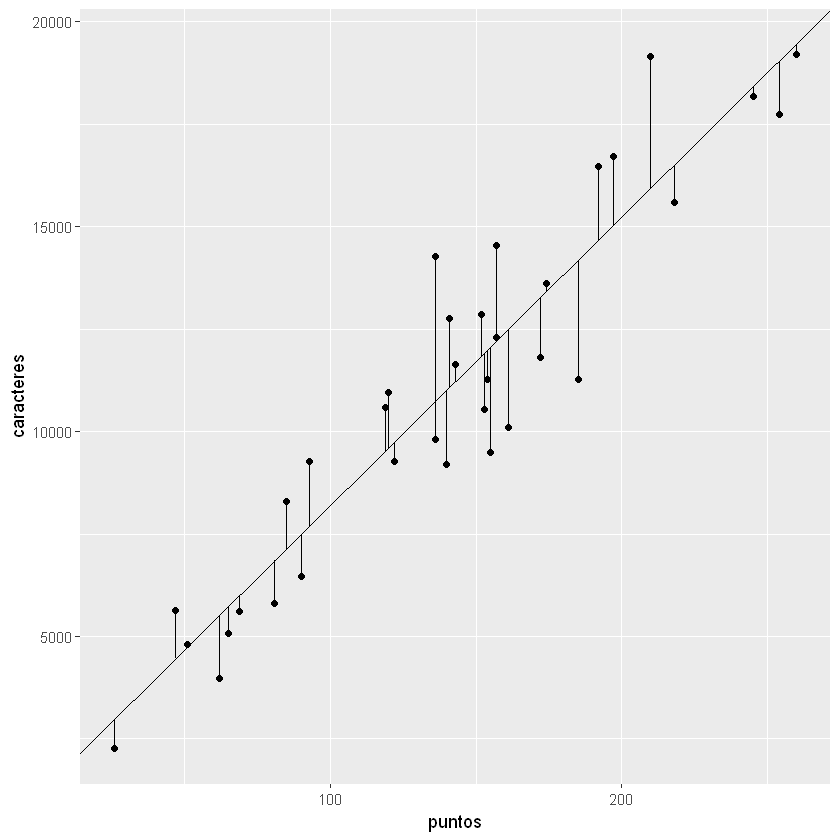

In [41]:
lm(formula = caracteres~puntos, chapPC)
rmseABline(a = 70.43, b = 1141.49)

[1] 4407.813

[[1]]

[[2]]
[1] 4407.813


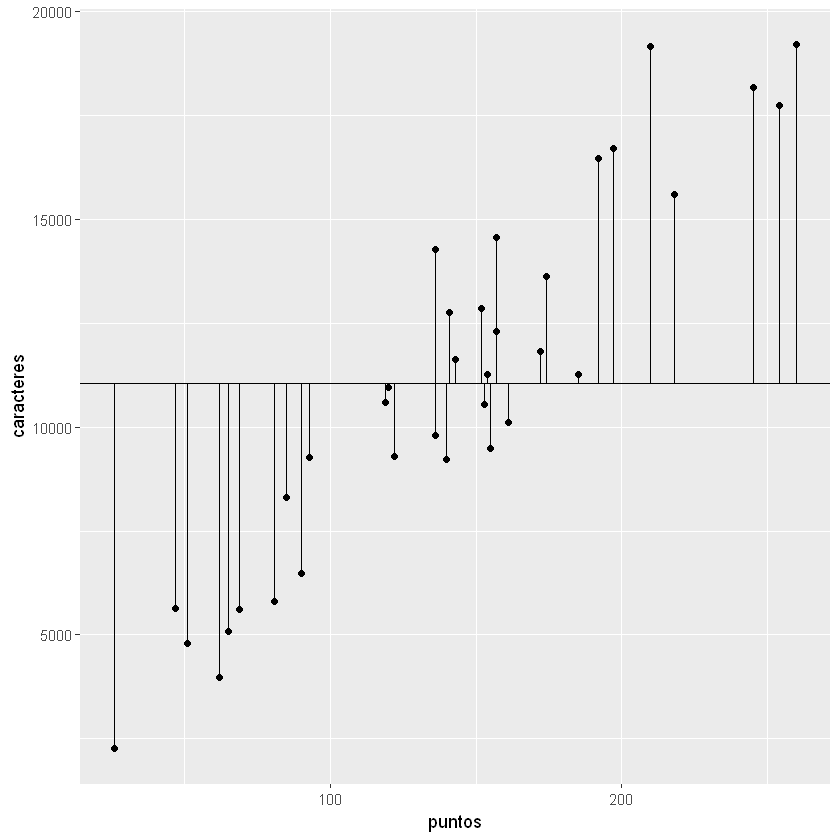

In [45]:
# sd clustering around a flat line.
# rmse clustering around A line.
n <- length(chapPC$caracteres)
sd(chapPC$caracteres)*sqrt((n-1)/n)
rmseABline(a = 0, b = mean(chapPC$caracteres))

In [14]:
Murders <- read.csv('C:/Users/Personal/Data-Science-Students/Tables/Tables_CS109/MA-crime-unemployment.csv', sep=",",
                  stringsAsFactors=FALSE)

head(Murders)

State,City,Population,Murders.and.manslaughters,Murders.per.10.000.people,Forcible.rapes,Rapes.per.10.000,Robberies,Robberies.per.10.000,Aggravated.assaults,Assaults.per.10.000,Burglaries,Burglaries.per.10.000,Larceny.thefts,Larceny.thefts.per.10.000,Motor.vehicle.thefts,Motor.vehicle.thefts.per.10.000,Arsons,Arsons.per.10.000,Unemployment.Aug.2010....
Massachusetts,Abington,16590,1,0.6,10,6.0,5,3.0,40,24.1,119,71.7,213,128.4,28,16.9,0,0.0,8.7
Massachusetts,Acton,20795,0,0.0,5,2.4,2,1.0,14,6.7,46,22.1,223,107.2,4,1.9,0,0.0,5.9
Massachusetts,Acushnet,10474,0,0.0,2,1.9,1,1.0,21,20.0,70,66.8,91,86.9,12,11.5,3,2.9,9.9
Massachusetts,Adams,8145,0,0.0,6,7.4,0,0.0,33,40.5,83,101.9,161,197.7,7,8.6,2,2.5,10.0
Massachusetts,Agawam,28353,0,0.0,6,2.1,7,2.5,30,10.6,80,28.2,206,72.7,39,13.8,5,1.8,8.6
Massachusetts,Amesbury,16421,0,0.0,6,3.7,3,1.8,37,22.5,40,24.4,241,146.8,10,6.1,3,1.8,7.9


In [15]:
#housing <- housing %>% mutate(ValPerSqFt = Full.Market.Value/Gross.SqFt) %>% select(Total.Units, Gross.SqFt, Boro, ValPerSqFt)
Murders <- Murders %>% select(City, Population, Unemployment = Unemployment.Aug.2010...., 
                              Crimes = Murders.per.10.000.people + Rapes.per.10.000)
head(Murders)

City,Population,Unemployment,Crimes
Abington,16590,8.7,119
Acton,20795,5.9,46
Acushnet,10474,9.9,70
Adams,8145,10.0,83
Agawam,28353,8.6,80
Amesbury,16421,7.9,40


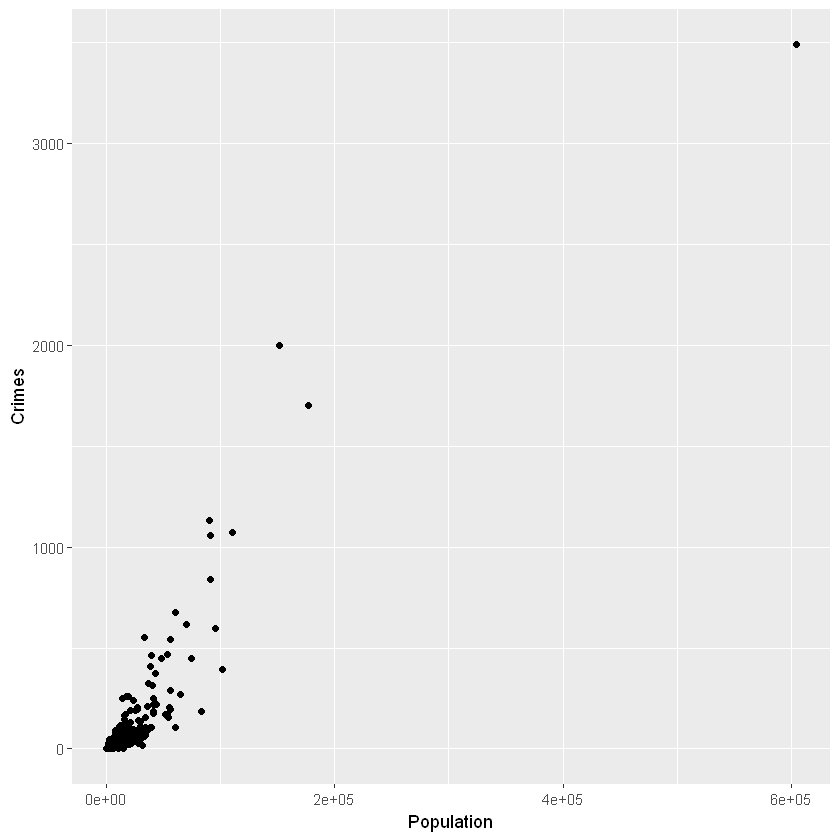

In [16]:
ggplot(Murders, aes(x = Population, y = Crimes)) +  geom_point()

Warning message:
"Removed 5 rows containing missing values (geom_point)."

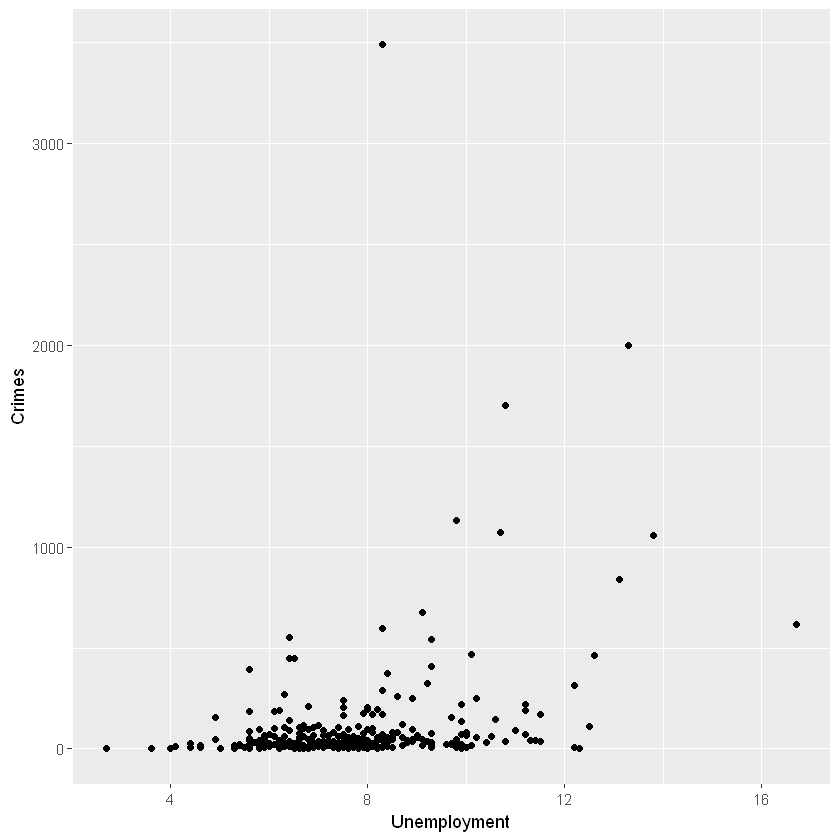

In [23]:
ggplot(Murders, aes(x = Unemployment, y = Crimes)) +  geom_point()

In [42]:
CrimePop <- lm(formula = Crimes~Population, data = Murders)

CrimePop
# predecir el # de crímenes en una ciudad de 200K habitantes

0.006*200000 - 24

predict(object = CrimePop, newdata = data.frame(Population = c(200000, 150000)))


Call:
lm(formula = Crimes ~ Population, data = Murders)

Coefficients:
(Intercept)   Population  
 -24.048163     0.006579  


[1] 1176

1        2 
1291.696  962.760

In [28]:
lm(formula = Crimes~Unemployment, data = Murders)


Call:
lm(formula = Crimes ~ Unemployment, data = Murders)

Coefficients:
 (Intercept)  Unemployment  
     -270.10         50.16  


In [21]:
Murders %>% arrange(desc(Crimes)) %>% head()

City,Population,Unemployment,Crimes
Boston,604465,8.3,3493
Springfield,151249,13.3,2002
Worcester,177151,10.8,1701
Lynn,90042,9.8,1133
Lowell,110136,10.7,1073
New Bedford,91473,13.8,1056


In [22]:
Murders %>% arrange(desc(Population)) %>% head()

City,Population,Unemployment,Crimes
Boston,604465,8.3,3493
Worcester,177151,10.8,1701
Springfield,151249,13.3,2002
Lowell,110136,10.7,1073
Cambridge,101362,5.6,396
Quincy,95061,8.3,598


In [44]:
CrimPopUn <- lm(formula = Crimes~Population + Unemployment, data = Murders)
CrimPopUn


Call:
lm(formula = Crimes ~ Population + Unemployment, data = Murders)

Coefficients:
 (Intercept)    Population  Unemployment  
  -2.199e+02     6.382e-03     2.596e+01  


In [56]:
predPop <- predict(object = CrimePop, newdata = data.frame(Population = Murders$Population)) 

mean((predPop - Murders$Crime)^2, na.rm = T)

[1] 13784.63

In [59]:
predPopUn <- predict(object = CrimPopUn, 
                     newdata = data.frame(Population = Murders$Population, Unemployment = Murders$Unemployment))

mean((predPopUn - Murders$Crimes)^2, na.rm = T)

[1] 11665.1

In [ ]:
library(GGally)
ggpairs(Murders[2:4])

In [60]:
lm(formula = ValPerSqFt~Total.Units + Gross.SqFt + Boro, data = housing)


Call:
lm(formula = ValPerSqFt ~ Total.Units + Gross.SqFt + Boro, data = housing)

Coefficients:
      (Intercept)        Total.Units         Gross.SqFt       BoroBrooklyn  
        4.329e+01         -1.881e-01          2.103e-04          3.456e+01  
    BoroManhattan         BoroQueens  BoroStaten Island  
        1.310e+02          3.299e+01         -3.630e+00  
